# Seattle Building Energy Forecasting

URL: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking

## Notebook n°4 - Bivariate Analysis / Feature Engineering

Objective: Better understand the infuence of each feature on the target

---

In [192]:
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Settings

In [193]:
sns.set(style="whitegrid")
target = "SiteEnergyUse(kBtu)"

target1 = "SiteEnergyUse(kBtu)"
target2 = "TotalGHGEmissions"

suffixe = ""
#suffixe = "-data-with-outliers"

## Import data

In [194]:
with open(f"data/part3{suffixe}.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    data = my_unpickler.load()

In [195]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Address,ZipCode,default_data
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,12.0,Hotel,88434.0,65.0,6981428.0,249.43,47.612190,-122.337997,405 OLIVE WAY,98101.0,False
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,11.0,Hotel,83880.0,51.0,8354235.0,263.51,47.613106,-122.333358,724 PINE ST,98101.0,False
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,2.0,Police Station,88830.0,NaN,12051984.0,304.62,47.616439,-122.336764,810 VIRGINIA ST,98101.0,False
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,11.0,Hotel,81352.0,25.0,6252842.0,208.46,47.614114,-122.332741,1619 9TH AVE,98101.0,False
7,2015,NonResidential,Other,7,DOWNTOWN,1926,8.0,Other - Entertainment/Public Assembly,102761.0,NaN,6426022.0,199.99,47.612902,-122.331309,901 PINE ST,98101.0,False


## Functions

In [196]:
def bivariate_analysis(data, x, y, aspect=15/5, rotation=0, violin=True):
    if violin:
        ax = sns.catplot(x=x, y=y, kind="violin", inner=None, data=data, height=5, aspect=aspect)
        plt.xticks(rotation=rotation)
        plt.show()
        
    ax = sns.catplot(x=x, y=y, kind="box", data=data, height=5, aspect=aspect)
    plt.xticks(rotation=rotation)
    plt.show()

## Pairplot

In [197]:
cols = ['YearBuilt', 'NumberofFloors', 'Latitude', 'Longitude', 'ENERGYSTARScore', 'LargestPropertyUseTypeGFA', target1, target2]

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


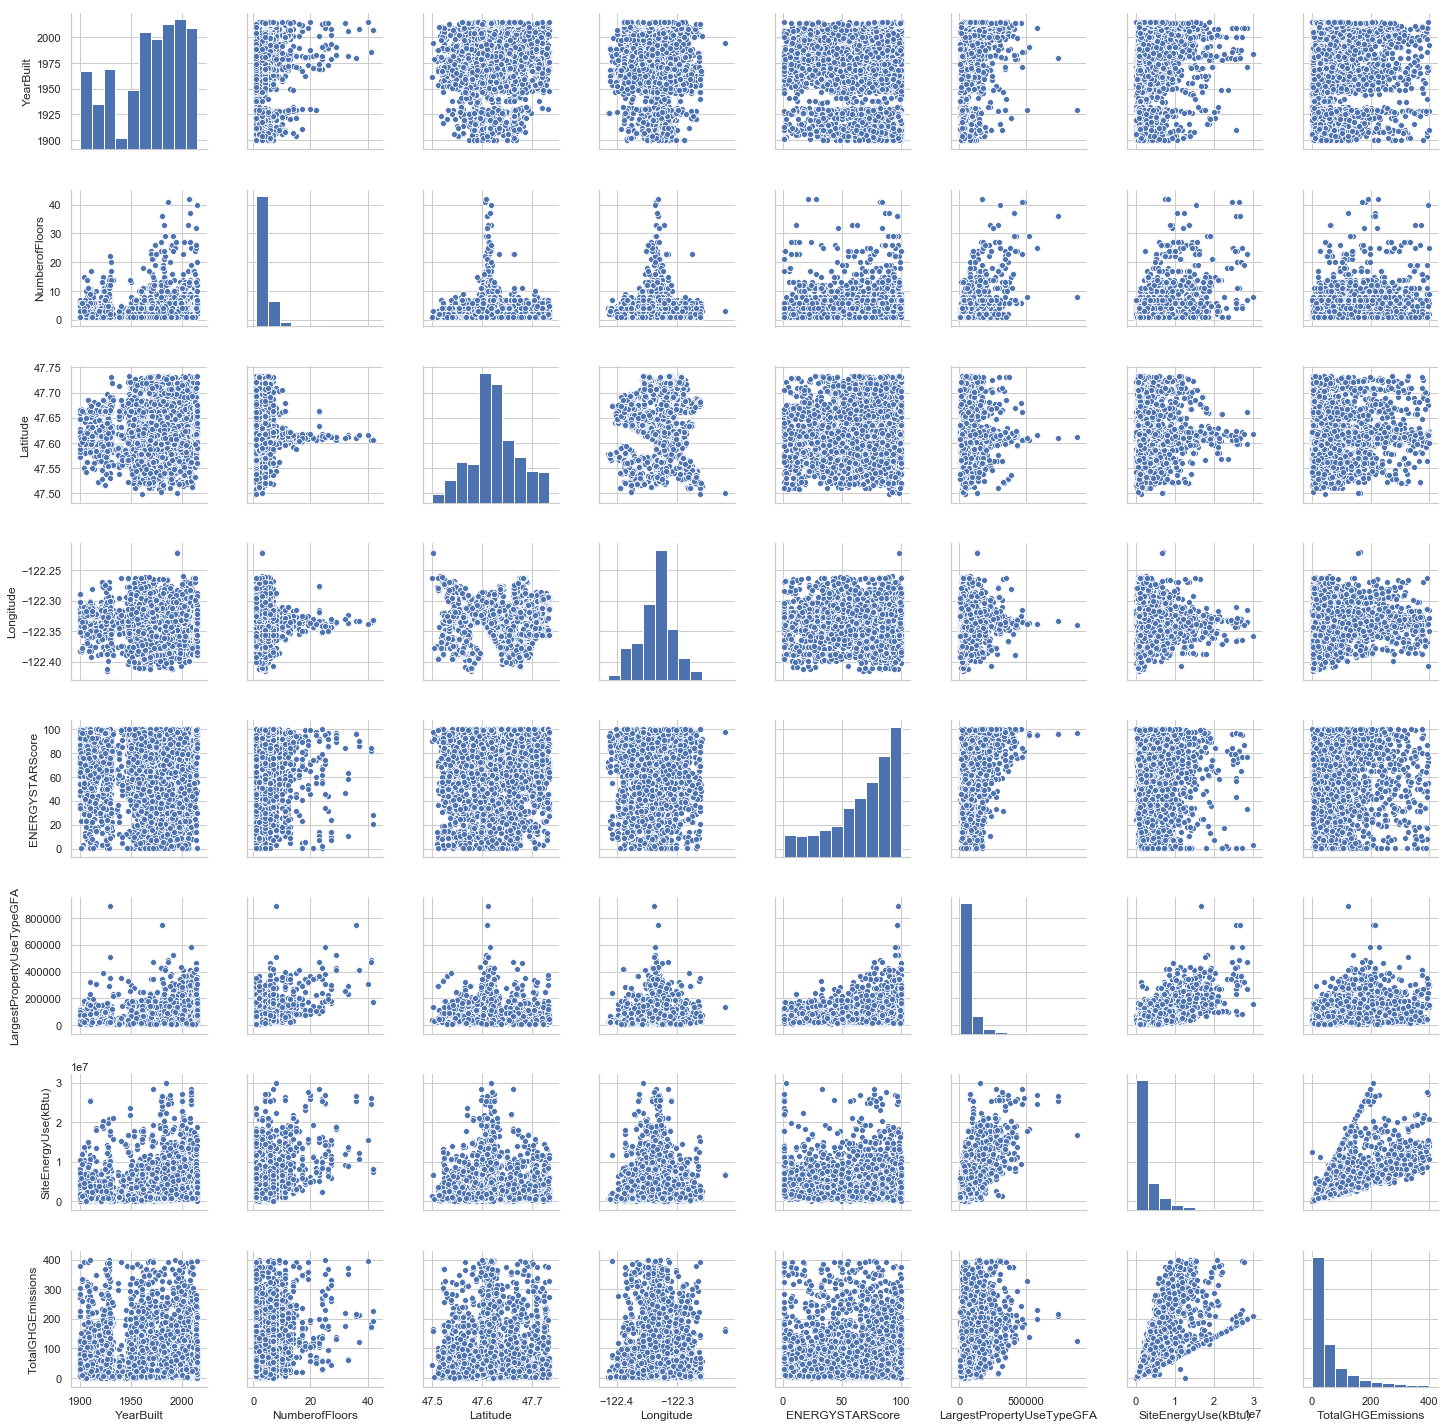

In [198]:
sns.pairplot(data[cols]);

## Correlation matrix

In [199]:
data.corr()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofFloors,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude
DataYear,1.000000,-0.004776,0.013452,0.006834,0.006740,0.001404,0.004257,0.005811,-0.005862,0.005581
CouncilDistrictCode,-0.004776,1.000000,-0.023991,0.269395,0.128222,0.071338,0.151183,0.110658,0.504755,-0.266076
YearBuilt,0.013452,-0.023991,1.000000,0.167568,0.236710,0.029376,0.139857,0.004642,0.123336,-0.057192
NumberofFloors,0.006834,0.269395,0.167568,1.000000,0.549322,0.032822,0.436577,0.280305,0.011504,-0.050645
LargestPropertyUseTypeGFA,0.006740,0.128222,0.236710,0.549322,1.000000,0.137781,0.734964,0.508504,-0.023560,0.017298
ENERGYSTARScore,0.001404,0.071338,0.029376,0.032822,0.137781,1.000000,-0.139227,-0.126989,0.089449,-0.043762
SiteEnergyUse(kBtu),0.004257,0.151183,0.139857,0.436577,0.734964,-0.139227,1.000000,0.759314,-0.035250,0.014841
TotalGHGEmissions,0.005811,0.110658,0.004642,0.280305,0.508504,-0.126989,0.759314,1.000000,-0.043844,0.035341
Latitude,-0.005862,0.504755,0.123336,0.011504,-0.023560,0.089449,-0.035250,-0.043844,1.000000,0.007614
Longitude,0.005581,-0.266076,-0.057192,-0.050645,0.017298,-0.043762,0.014841,0.035341,0.007614,1.000000


## SiteEnergyUse(kBtu) x TotalGHGEmission

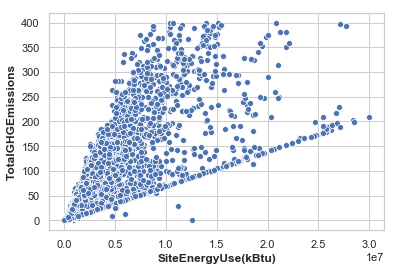

In [200]:
sns.scatterplot(data=data, x=target1, y=target2);
plt.xlabel(target1, fontweight="bold")
plt.ylabel(target2, fontweight="bold")
plt.show()

## Building Type

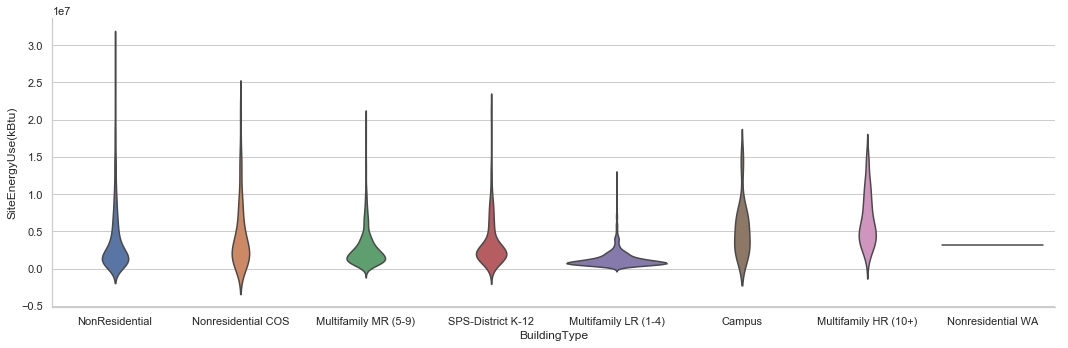

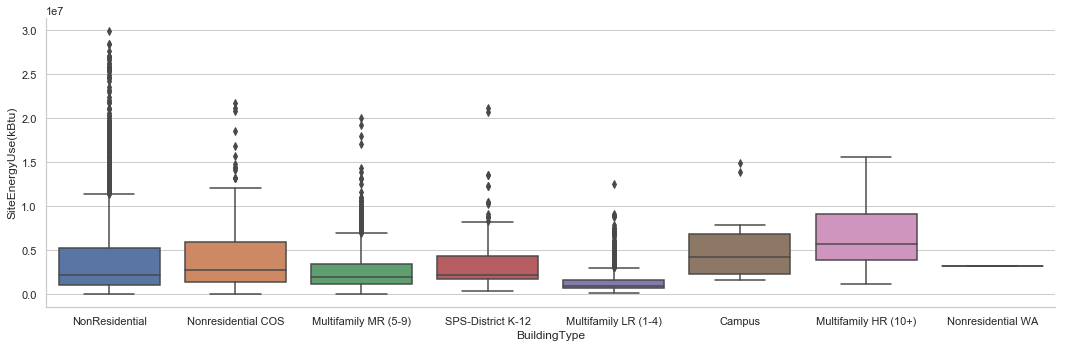

In [201]:
bivariate_analysis(data, "BuildingType", target)

## CouncilDistrictCode

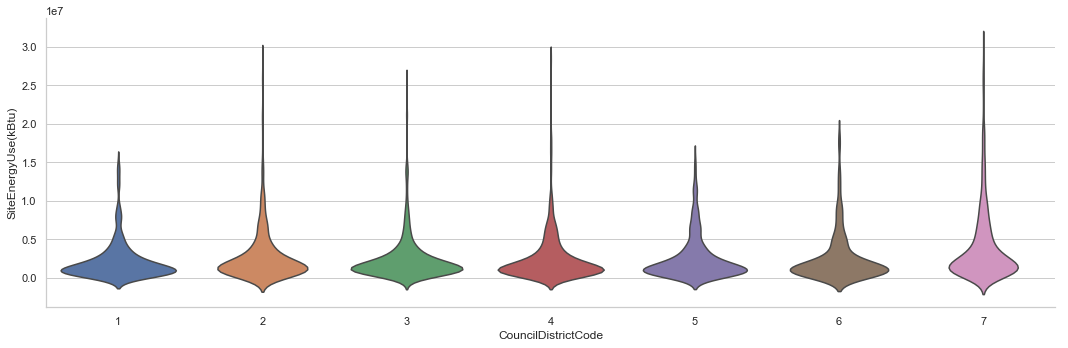

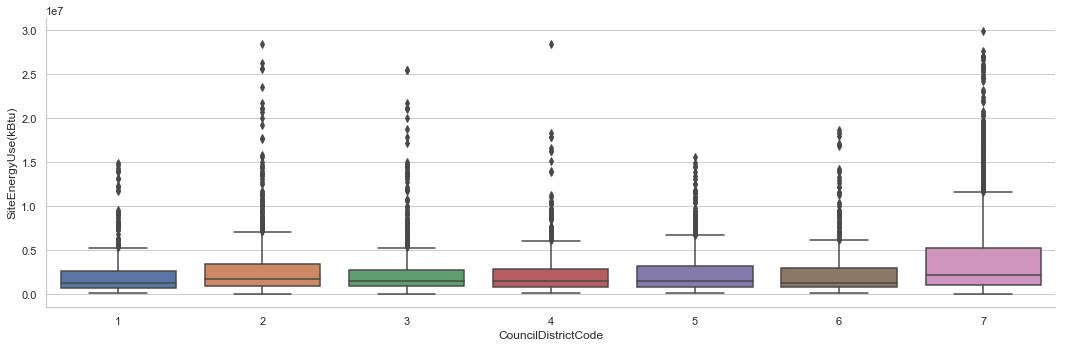

In [202]:
bivariate_analysis(data, "CouncilDistrictCode", target)

## Neighborhood

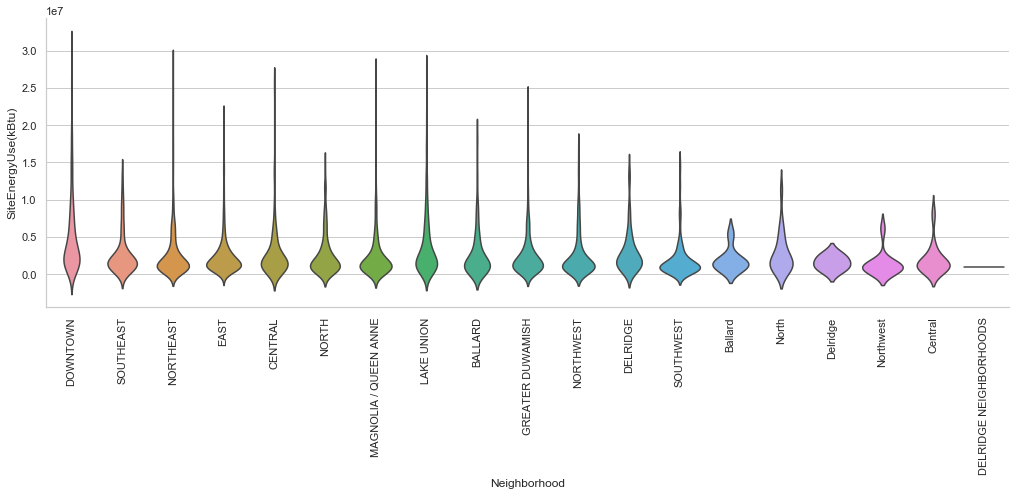

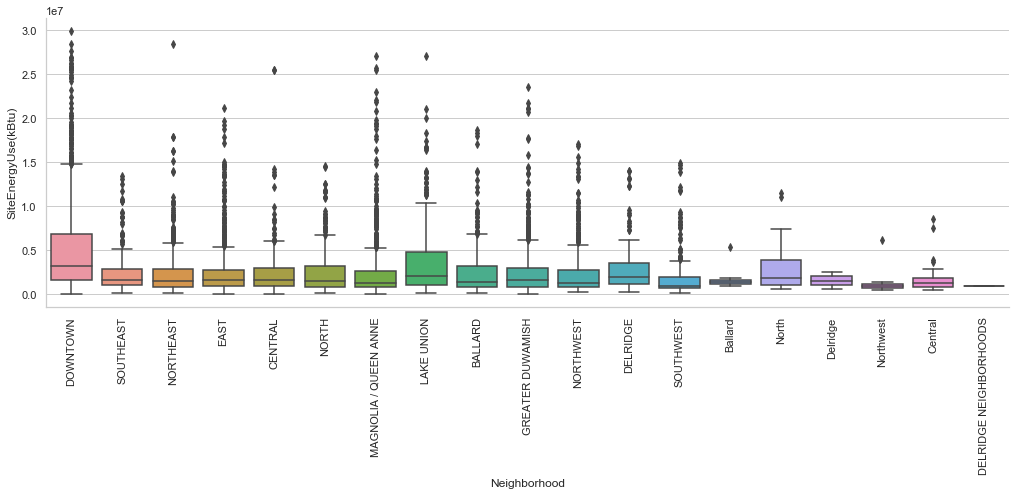

In [203]:
bivariate_analysis(data, "Neighborhood", target, rotation=90)

## Latitude / Longitude

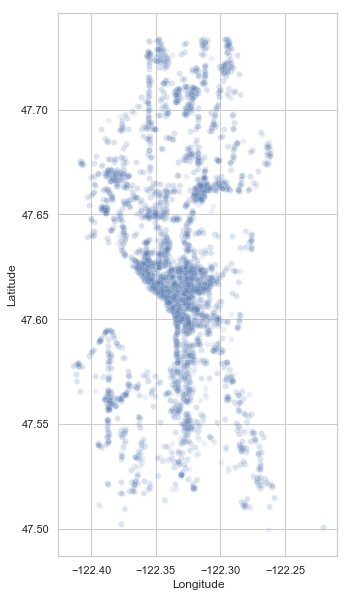

In [204]:
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(x="Longitude", y="Latitude", data=data, alpha=0.1);

Let's create a range for Latitude and Longitude

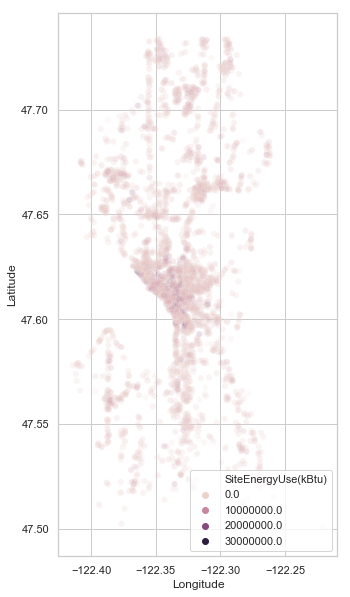

In [205]:
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(x="Longitude", y="Latitude", data=data, alpha=0.1, hue=data["SiteEnergyUse(kBtu)"]);

## Number of floors x Site Energy Use

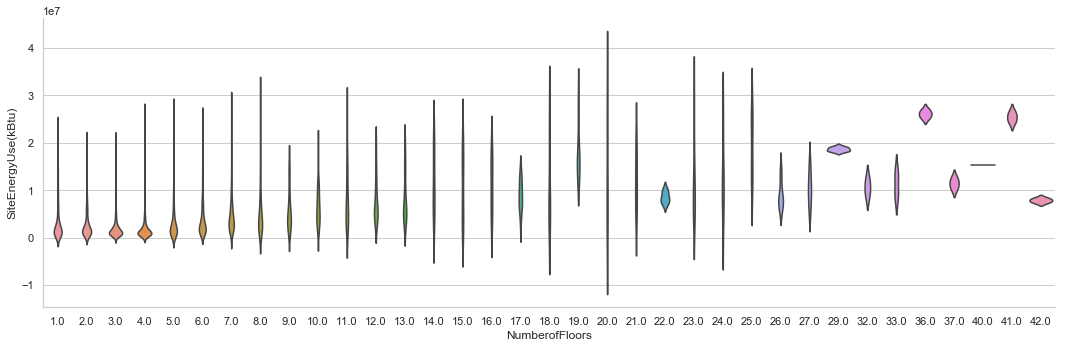

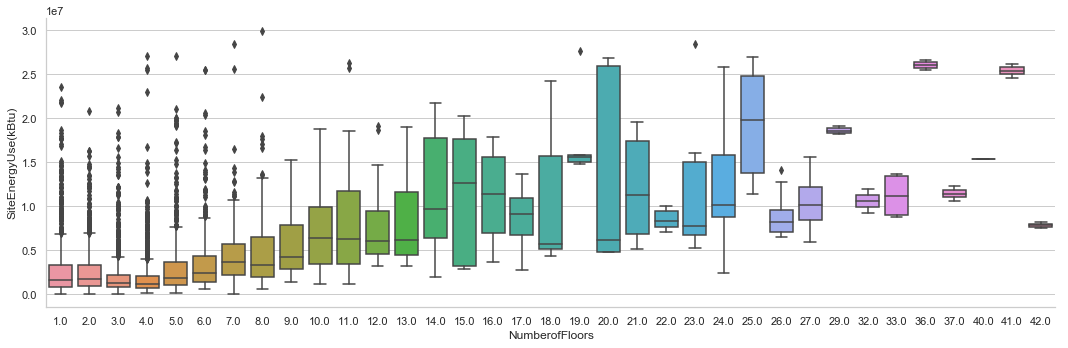

In [206]:
bivariate_analysis(data, "NumberofFloors", target)

## LargestPropertyUseTypeGFA x Site Energy Use

#### Scatter plot

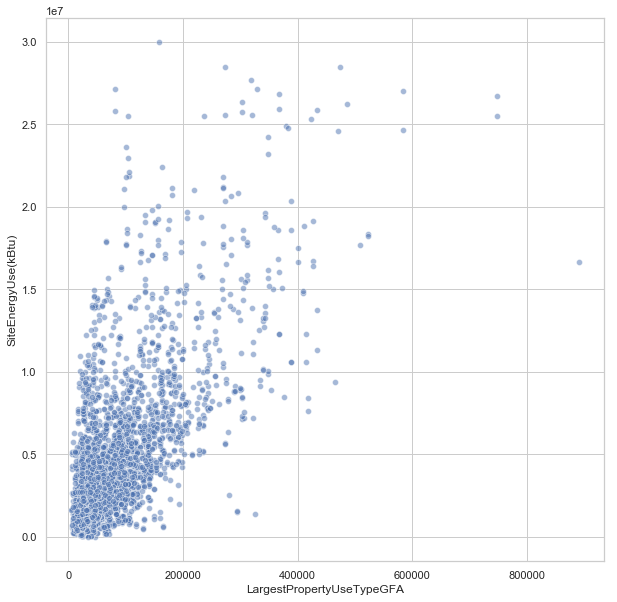

In [207]:
# Scatter plot
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="LargestPropertyUseTypeGFA", y=target1, data=data, alpha=0.5)
plt.show()

## Boxplot by GFA class

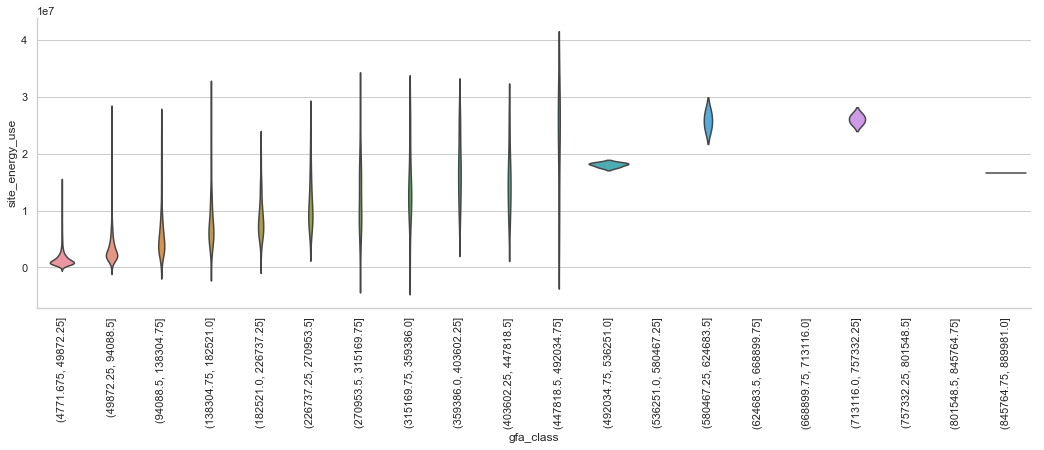

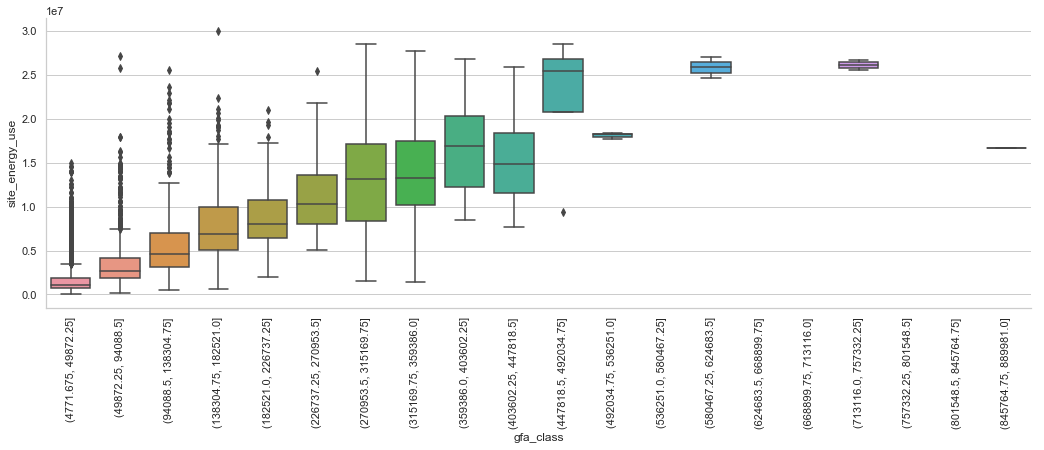

In [208]:
gfa_class = pd.cut(data["LargestPropertyUseTypeGFA"], bins=20)

gfa_df = {
    'gfa_class': gfa_class,
    'site_energy_use': data[target]
}
gfa_df = pd.DataFrame(gfa_df)

bivariate_analysis(gfa_df, "gfa_class", "site_energy_use", rotation=90)

In [209]:
def lat_long_range(data):
    data["latitude_range"] = pd.cut(data["Latitude"], bins=14, labels=False)
    data["longitude_range"] = pd.cut(data["Longitude"], bins=7, labels=False)
    data["lat_long_range"] = data["latitude_range"].astype(str) + data["longitude_range"].astype(str)

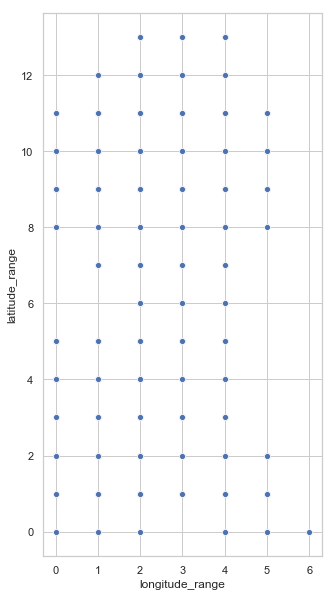

In [210]:
lat_long_range(data)
fig, ax = plt.subplots(figsize=(5,10))
sns.scatterplot(x="longitude_range", y="latitude_range", data=data);

In [211]:
data.drop(["latitude_range", "longitude_range"], axis=1, inplace=True)

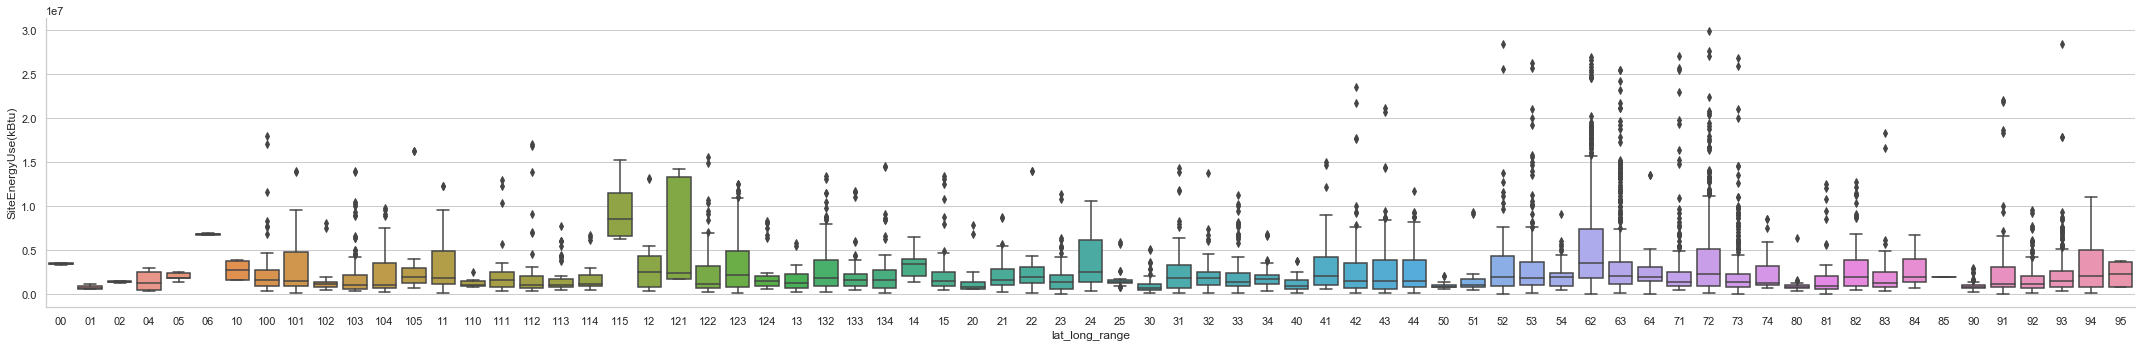

In [212]:
x = "lat_long_range"
y = target

sns.catplot(x=x, y=y, kind="box", data=data, height=5, aspect=30/5);

## Latitude x Site Energy Use

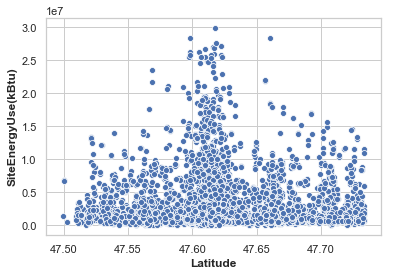

In [213]:
sns.scatterplot(data=data, x="Latitude", y=target1);
plt.xlabel("Latitude", fontweight="bold")
plt.ylabel(target1, fontweight="bold")
plt.show()

## Longitude x Site Energy Use

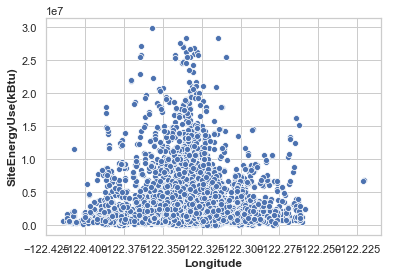

In [214]:
sns.scatterplot(data=data, x="Longitude", y=target1);
plt.xlabel("Longitude", fontweight="bold")
plt.ylabel(target1, fontweight="bold")
plt.show()

## Address

In [215]:
def address_type(val):
    if (re.search("WAY|Way", val)):
        return "Way"
    
    elif (re.search("ST|St | St$|Street", val)):
        return "Street"
    
    elif (re.search("AVE|Ave", val)):
        return "Avenue"
    
    else:
        return "Other"

In [216]:
data["address_type"] = data["Address"].apply(address_type)

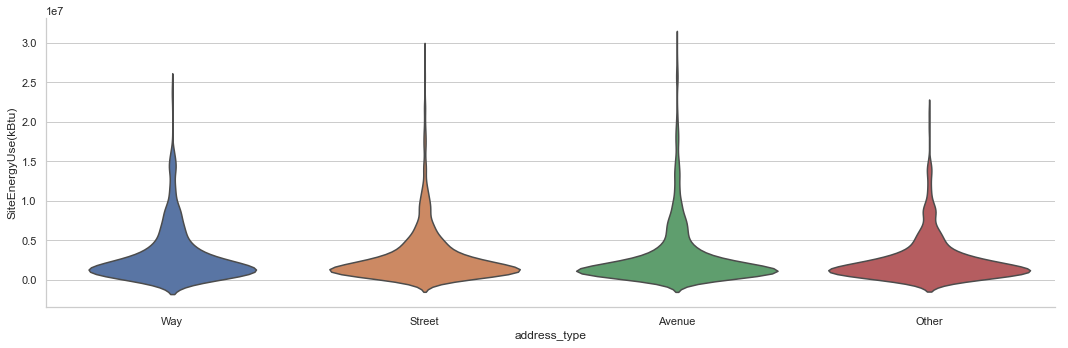

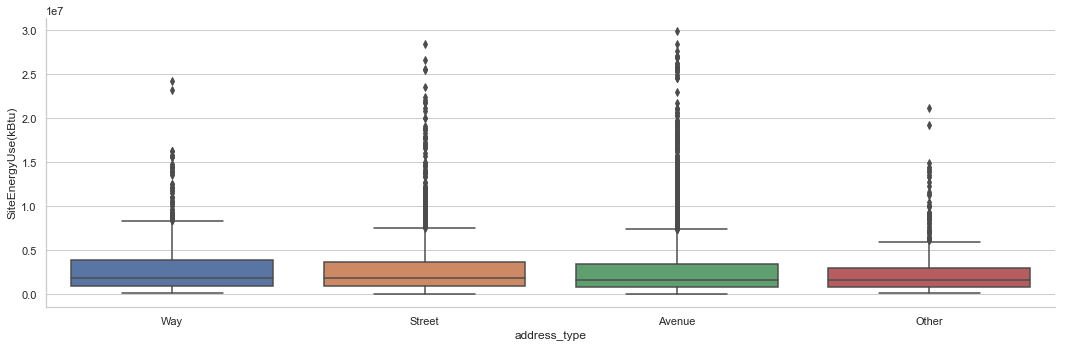

In [217]:
bivariate_analysis(data, "address_type", target)

### LargestPropertyUseType

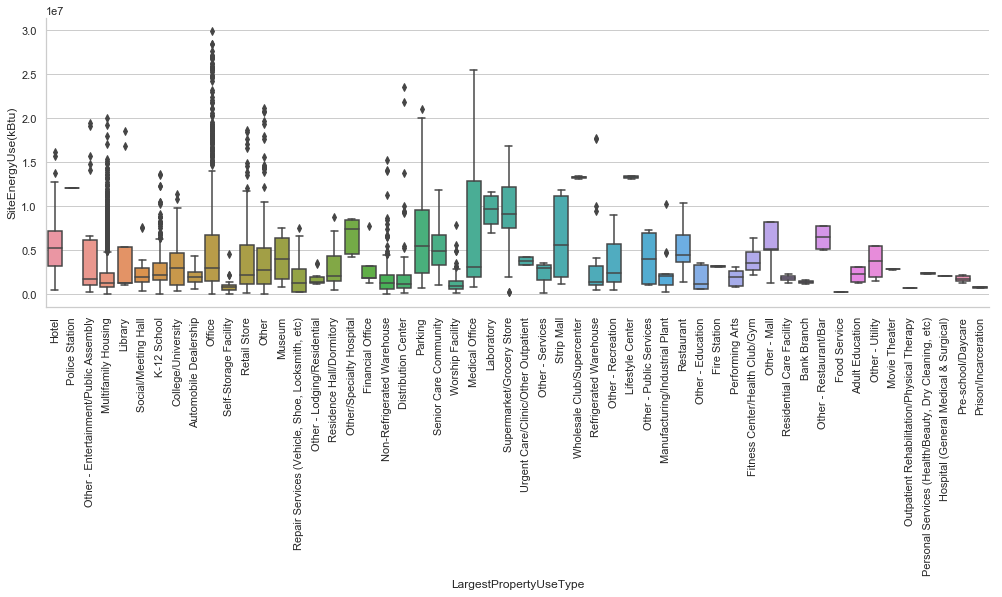

In [218]:
bivariate_analysis(data, "LargestPropertyUseType", target, rotation=90, violin=False)

## PrimaryPropertyType

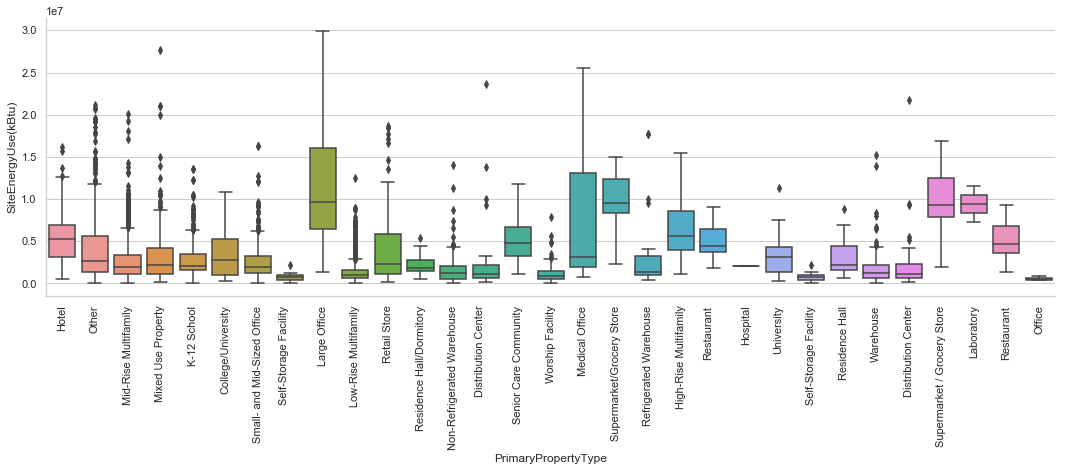

In [219]:
bivariate_analysis(data, "PrimaryPropertyType", target, rotation=90, violin=False)

#### Let's compare PrimaryPropertyType and LargestPropertyUse

In [220]:
mask = data["PrimaryPropertyType"] == data["LargestPropertyUseType"]
data_len = data.shape[0]

print(data_len)
print(data[mask].shape[0])
print(data[mask].shape[0] / data_len)

6205
1332
0.21466559226430298


In [221]:
data.shape

(6205, 19)

In [222]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Address,ZipCode,default_data,lat_long_range,address_type
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,12.0,Hotel,88434.0,65.0,6981428.0,249.43,47.612190,-122.337997,405 OLIVE WAY,98101.0,False,62,Way
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,11.0,Hotel,83880.0,51.0,8354235.0,263.51,47.613106,-122.333358,724 PINE ST,98101.0,False,62,Street
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,2.0,Police Station,88830.0,NaN,12051984.0,304.62,47.616439,-122.336764,810 VIRGINIA ST,98101.0,False,62,Street
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,11.0,Hotel,81352.0,25.0,6252842.0,208.46,47.614114,-122.332741,1619 9TH AVE,98101.0,False,62,Avenue
7,2015,NonResidential,Other,7,DOWNTOWN,1926,8.0,Other - Entertainment/Public Assembly,102761.0,NaN,6426022.0,199.99,47.612902,-122.331309,901 PINE ST,98101.0,False,62,Street


## Save data

In [223]:
with open(f"data/part4{suffixe}.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(data)